In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import itertools

In [3]:
def compute_pos(xticks, width, i, models):
    index = np.arange(len(xticks))
    n = len(models)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar):
    for rect in bar:
        height = rect.get_height()
        posx = rect.get_x()+rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.4f' % height, rotation=90, 
                ha='center', va='bottom', fontsize=18, zorder=3)

In [6]:
def plot(xticks, data, ylim=None, figsize=(35, 12), bol=True):
    fig, axs = plt.subplots(1,3,figsize=figsize,dpi=300)
    # colors = ['#375CAA', '#FBB26B', '#C7CCDB', '#66A5C9', '#8A6AAB', #F16745]
    if bol == True:
        colors = ['#C7CCDB', '#FBB26B', '#FBB26B', '#66A5C9', '#8A6AAB']
        start_lim = [0.99, 0.97, 0.96]
        width = 0.25
    else:
        colors = ['#375CAA', '#C7CCDB', '#FBB26B', '#66A5C9', '#8A6AAB']
        start_lim = [0.99, 0.90, 0.95]
        width = 0.2

    # hatches = ['/', '//', '\\', 'x', '-', '+']
    hatches = itertools.cycle(['', '/', '\\', '.'])
    
    for idx in range(3):
        for i, model in enumerate(data[idx].keys()):
            pos = compute_pos(xticks, width, i, data[idx].keys())
            bars = axs[idx].bar(pos, data[idx][model], width=width, label=model, color=colors[i], edgecolor='black')
            # for j, bar in enumerate(bars):
            #     bar.set_hatch(next(hatches))
            # present_height(ax, bar)
        
        axs[idx].set_xticks(np.arange(len(xticks)))
        axs[idx].set_xticklabels(xticks, fontsize=20)	

        if not ylim is None:
            axs[idx].set_ylim(start_lim[idx], ylim[idx])
        axs[idx].set_ylabel('', fontsize=30)
        axs[idx].legend(loc='lower right', shadow=True, ncol=1, fontsize=30)
        axs[idx].set_axisbelow(True)
        axs[idx].yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
        axs[idx].tick_params(axis='both', which='major', labelsize=30) 
    
    return fig, axs

In [ ]:
%matplotlib inline
attacks = ['Positional encoding', 'Time encoding']
data_by_bs = [
    {
        'Precision': [ 0.9999, 1.0 ],
        'Recall': [ 0.9995, 1.0 ],
        'F1': [ 0.9997, 1.0 ] 
    },
    {
        'Precision': [ 0.98, 1.0 ],
        'Recall': [ 0.992, 1.0 ],
        'F1': [ 0.983, 1.0 ]
    }, 
    {
        'Precision': [ 0.985, 1.0 ],
        'Recall': [ 0.972, 1.0 ],
        'F1': [ 0.976, 1.0 ]
    }
]


data_res = []
for data in data_by_bs:
    data_by_attack = np.array([v for _, v in data.items()]).T
    data_by_attack = {k: v for k, v in zip(attacks, data_by_attack)}
    print(data_by_attack)
    data_res.append(data_by_attack)

xticks = ['Precision', 'Recall', 'F1']
fig, axs = plot(xticks, data_res, ylim=[1.0005, 1.001, 1.001], figsize=(35, 11))


axs[0].set_xlabel('(a) Car Hacking dataset', fontsize=40, labelpad=20)
axs[1].set_xlabel('(b) ROAD Masquerade dataset', fontsize=40, labelpad=20)
axs[2].set_xlabel('(c) ROAD Fabrication dataset', fontsize=40, labelpad=20)

plt.tight_layout()
# Add space between subplots
plt.subplots_adjust(wspace=0.18)    
# plt.savefig('../figures/hyperparams.png', dpi=300)

{'None': array([0.997, 0.996, 0.998]), 'Only TSE': array([0.9992, 0.999 , 0.9995]), 'Only AE': array([0.9999, 0.9999, 0.9999]), 'Both TSE & AE': array([1., 1., 1.])}
{'None': array([0.9782, 0.9623, 0.9698]), 'Only TSE': array([0.9808, 0.9808, 0.9808]), 'Only AE': array([0.9994, 0.9808, 0.9895]), 'Both TSE & AE': array([1., 1., 1.])}
{'None': array([0.9697, 0.9827, 0.9759]), 'Only TSE': array([0.995 , 0.9984, 0.9988]), 'Only AE': array([0.998 , 0.9986, 0.9988]), 'Both TSE & AE': array([0.9998, 0.999 , 0.9994])}


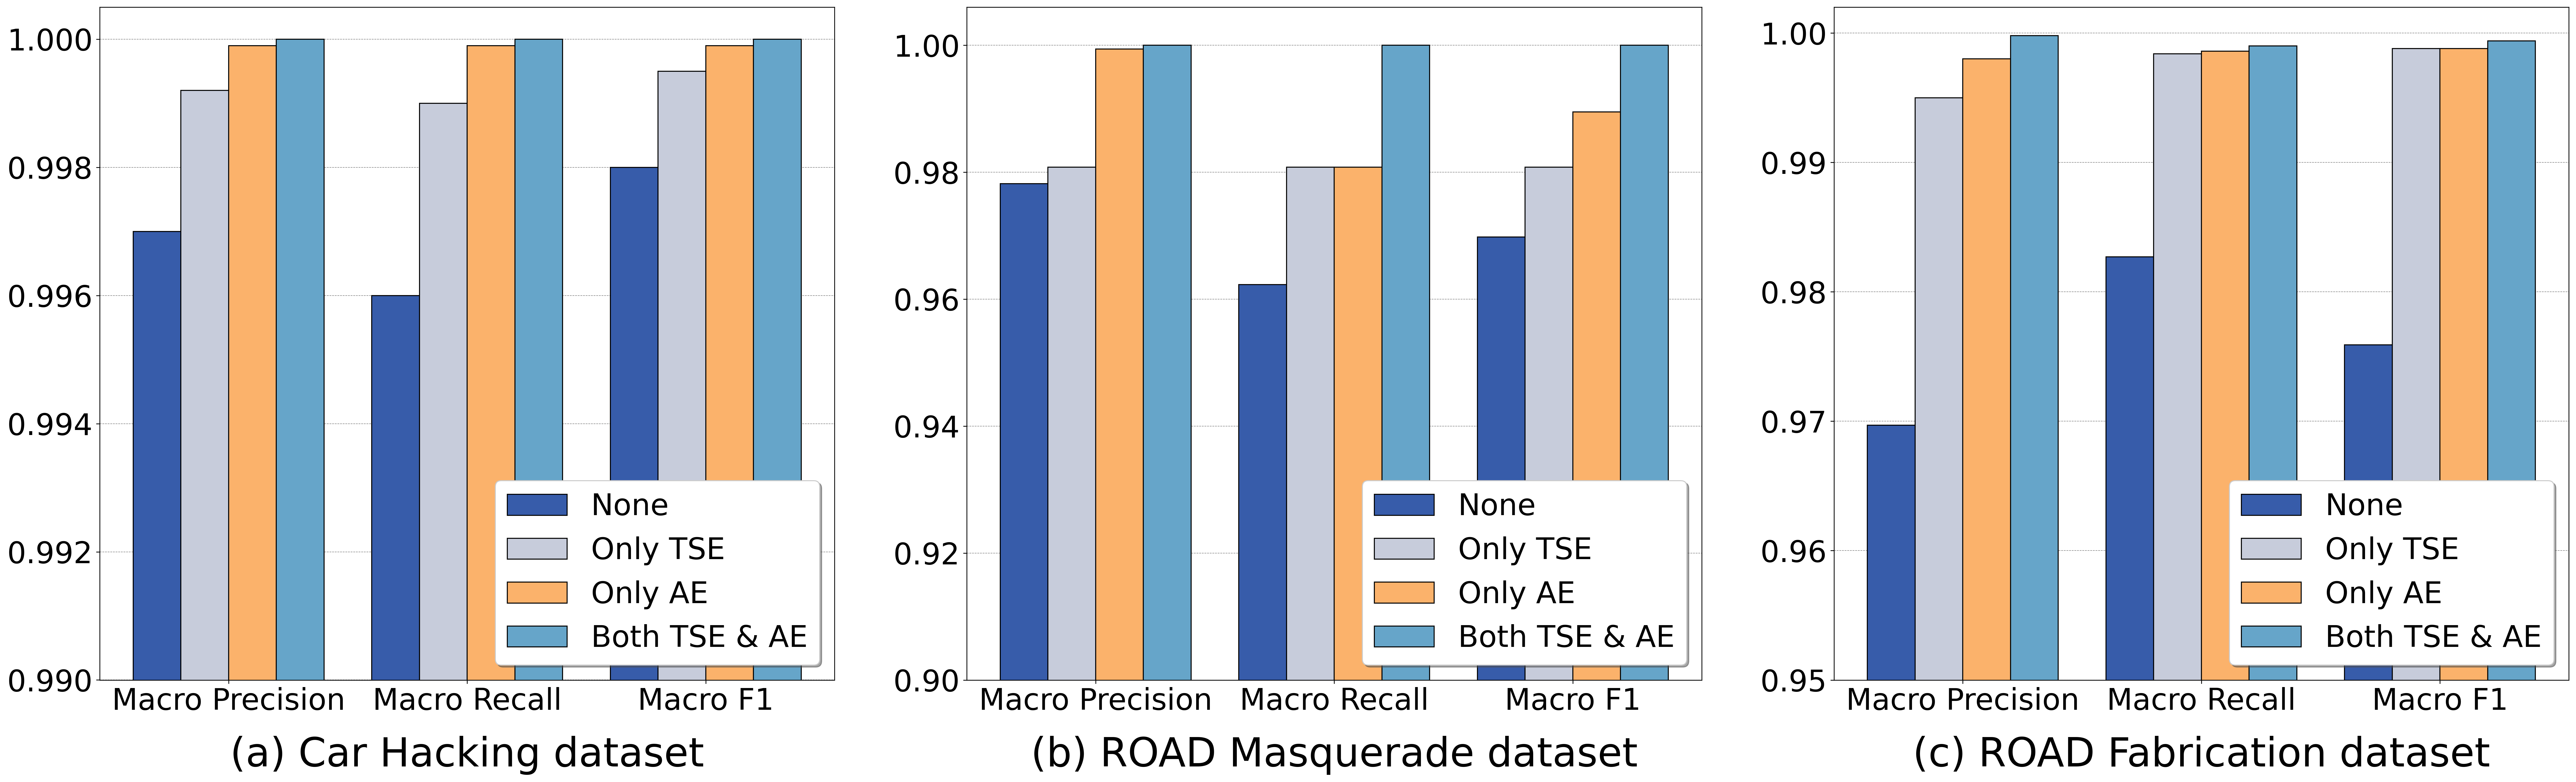

In [7]:
%matplotlib inline
attacks = ['None', 'Only TSE', 'Only AE', 'Both TSE & AE']
data_by_bs_2 = [
    {
    'Macro Precision': [ 0.997, 0.9992, 0.9999, 1.0 ],
    'Macro Recall': [ 0.996, 0.9990, 0.9999, 1.0 ],
    'Macro F1': [ 0.998, 0.9995, 0.9999, 1.0 ]
    },
    {
    'Macro Precision': [ 0.9782, 0.9808, 0.9994, 1.0 ],
    'Macro Recall': [ 0.9623, 0.9808, 0.9808, 1.0 ],
    'Macro F1': [  0.9698, 0.9808, 0.9895, 1.0 ]
    },
    {
    'Macro Precision': [ 0.9697, 0.995, 0.998, 0.9998 ],
    'Macro Recall': [ 0.9827, 0.9984, 0.9986, 0.9990 ],
    'Macro F1': [ 0.9759, 0.9988, 0.9988, 0.9994 ]
    },
]

data_res = []
for data in data_by_bs_2:
    data_by_attack = np.array([v for _, v in data.items()]).T
    data_by_attack = {k: v for k, v in zip(attacks, data_by_attack)}
    print(data_by_attack)
    data_res.append(data_by_attack)

xticks = ['Macro Precision', 'Macro Recall', 'Macro F1']
fig, axs = plot(xticks, data_res, ylim=[1.0005, 1.006, 1.002], figsize=(36, 11), bol=False)


axs[0].set_xlabel('(a) Car Hacking dataset', fontsize=40, labelpad=20)
axs[1].set_xlabel('(b) ROAD Masquerade dataset', fontsize=40, labelpad=20)
axs[2].set_xlabel('(c) ROAD Fabrication dataset', fontsize=40, labelpad=20)

plt.tight_layout()
# Add space between subplots
plt.subplots_adjust(wspace=0.18)    
# plt.savefig('../figures/hyperparams.png', dpi=300)

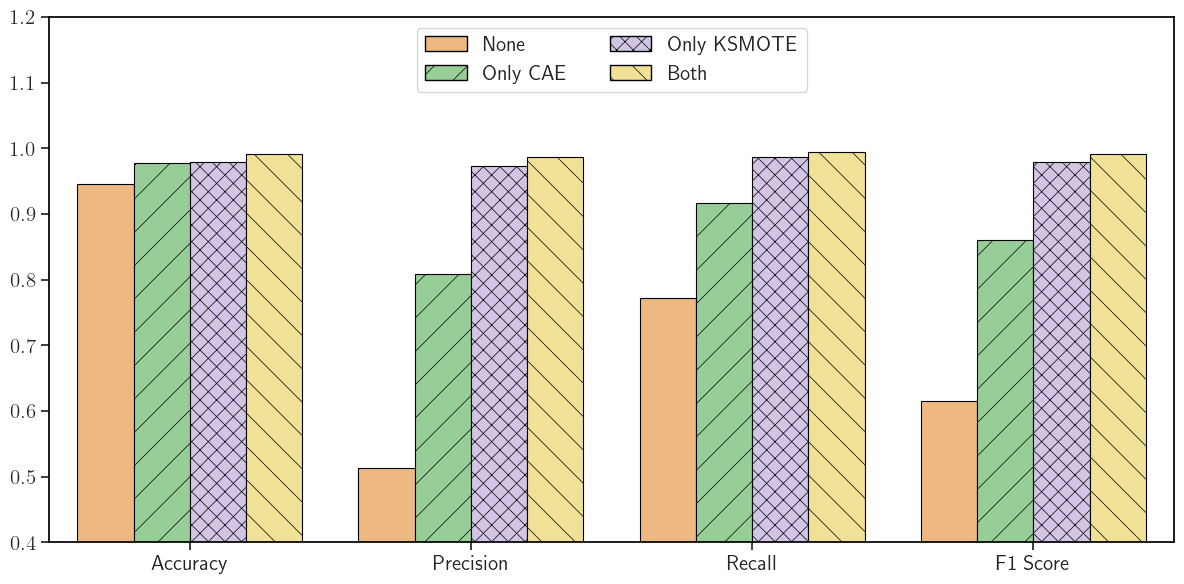

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.patches as mpatches

mpl.rcParams.update(mpl.rcParamsDefault)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.weight": "bold"
})


# Data preparation
data = {
    'Category': ['Accuracy','Precision', 'Recall', 'F1 Score'] * 4,
    'Model': ['None'] * 4 + ['Only CAE'] * 4 + ['Only KSMOTE'] * 4 + ['Both'] * 4,
    'Accuracy': [0.946, 0.513, 0.772, 0.616,
                 0.978, 0.809, 0.917, 0.86, 
                 0.980, 0.974, 0.987, 0.98,
                 0.991, 0.987, 0.995, 0.991]
}

df = pd.DataFrame(data)

mpl.rcParams['hatch.linewidth'] = 0.5

custom_palette = sns.color_palette(["#FFBA6E", "#8ED68E", "#D1BEEA", "#FFEB88"])
# custom_palette = sns.color_palette(["#FFBA6E", "#8ED68E", "#D1BEEA", "#FFEB88", "#96B5EC", "#9F749F"])

sns.set_theme(style="ticks")
# Plotting with seaborn and matplotlib
# sns.set_theme(style='whitegrid')
fig, axs = plt.subplots(1, 1, figsize=(12, 6), sharey=False)

metrics = ['Accuracy', 'FNR', 'FPR']
hatches = ['', '/', 'xx', '\\', '-', '+']
models = df['Model'].unique()
model_to_hatch = dict(zip(models, hatches))

sns.barplot(x='Category', y=metrics[0], hue='Model', data=df, ax=axs, edgecolor='black', linewidth=0.8, palette=custom_palette)
    
for i, patch in enumerate(axs.patches):
    # Determine the model associated with the current patch
    model_index = i // len(df['Category'].unique())
    if model_index >= len(models):
        continue
    model_name = models[model_index]
    patch.set_hatch(model_to_hatch[model_name])

# Set the color of the subplot borders to black
for spine in axs.spines.values():
    spine.set_color('black')

# ax.set_title(metric)
axs.set_ylim(0.4, 1.2)
axs.set_xlabel(r'\textbf{Ablation experiments on SGCC dataset}', fontsize=18)
axs.set_xlabel('', fontsize=18)
# axs.set_ylabel(r'\textbf{{{}}}'.format(metric), fontsize=18)
axs.set_ylabel('', fontsize=18)

# Increase the font size of the tick labels
axs.tick_params(axis='both', labelsize=15)

# Create a custom legend for the current subplot
handles, labels = axs.get_legend_handles_labels()
new_handles = []
for handle, label in zip(handles, labels):
    for model, hatch in model_to_hatch.items():
        if model in label:
            new_handles.append(mpatches.Patch(facecolor=handle.get_facecolor(), hatch=hatch, label=label, edgecolor='black'))
axs.legend(handles=new_handles, loc='upper center', ncol=2, fontsize=15)

# for ax, metric in zip(axs, metrics):
#     sns.barplot(x='Category', y=metric, hue='Model', data=df, ax=ax, edgecolor='black', linewidth=0.8, palette=custom_palette)
    
#     for i, patch in enumerate(ax.patches):
#         # Determine the model associated with the current patch
#         model_index = i // len(df['Category'].unique())
#         if model_index >= len(models):
#             continue
#         model_name = models[model_index]
#         patch.set_hatch(model_to_hatch[model_name])
    
#     # Set the color of the subplot borders to black
#     for spine in ax.spines.values():
#         spine.set_color('black')
    
#     # ax.set_title(metric)
#     ax.set_ylim(0, 1.2)
#     ax.set_xlabel(r'\textbf{SGCC Dataset}', fontsize=18)
#     ax.set_ylabel(r'\textbf{{{}}}'.format(metric), fontsize=18)
    
#     # Increase the font size of the tick labels
#     ax.tick_params(axis='both', labelsize=15)
    
#     # Create a custom legend for the current subplot
#     handles, labels = ax.get_legend_handles_labels()
#     new_handles = []
#     for handle, label in zip(handles, labels):
#         for model, hatch in model_to_hatch.items():
#             if model in label:
#                 new_handles.append(mpatches.Patch(facecolor=handle.get_facecolor(), hatch=hatch, label=label, edgecolor='black'))
#     ax.legend(handles=new_handles, loc='upper center', ncol=2, fontsize=15)

plt.tight_layout()
plt.show()

In [65]:
i // len(df['Category'].unique())

4

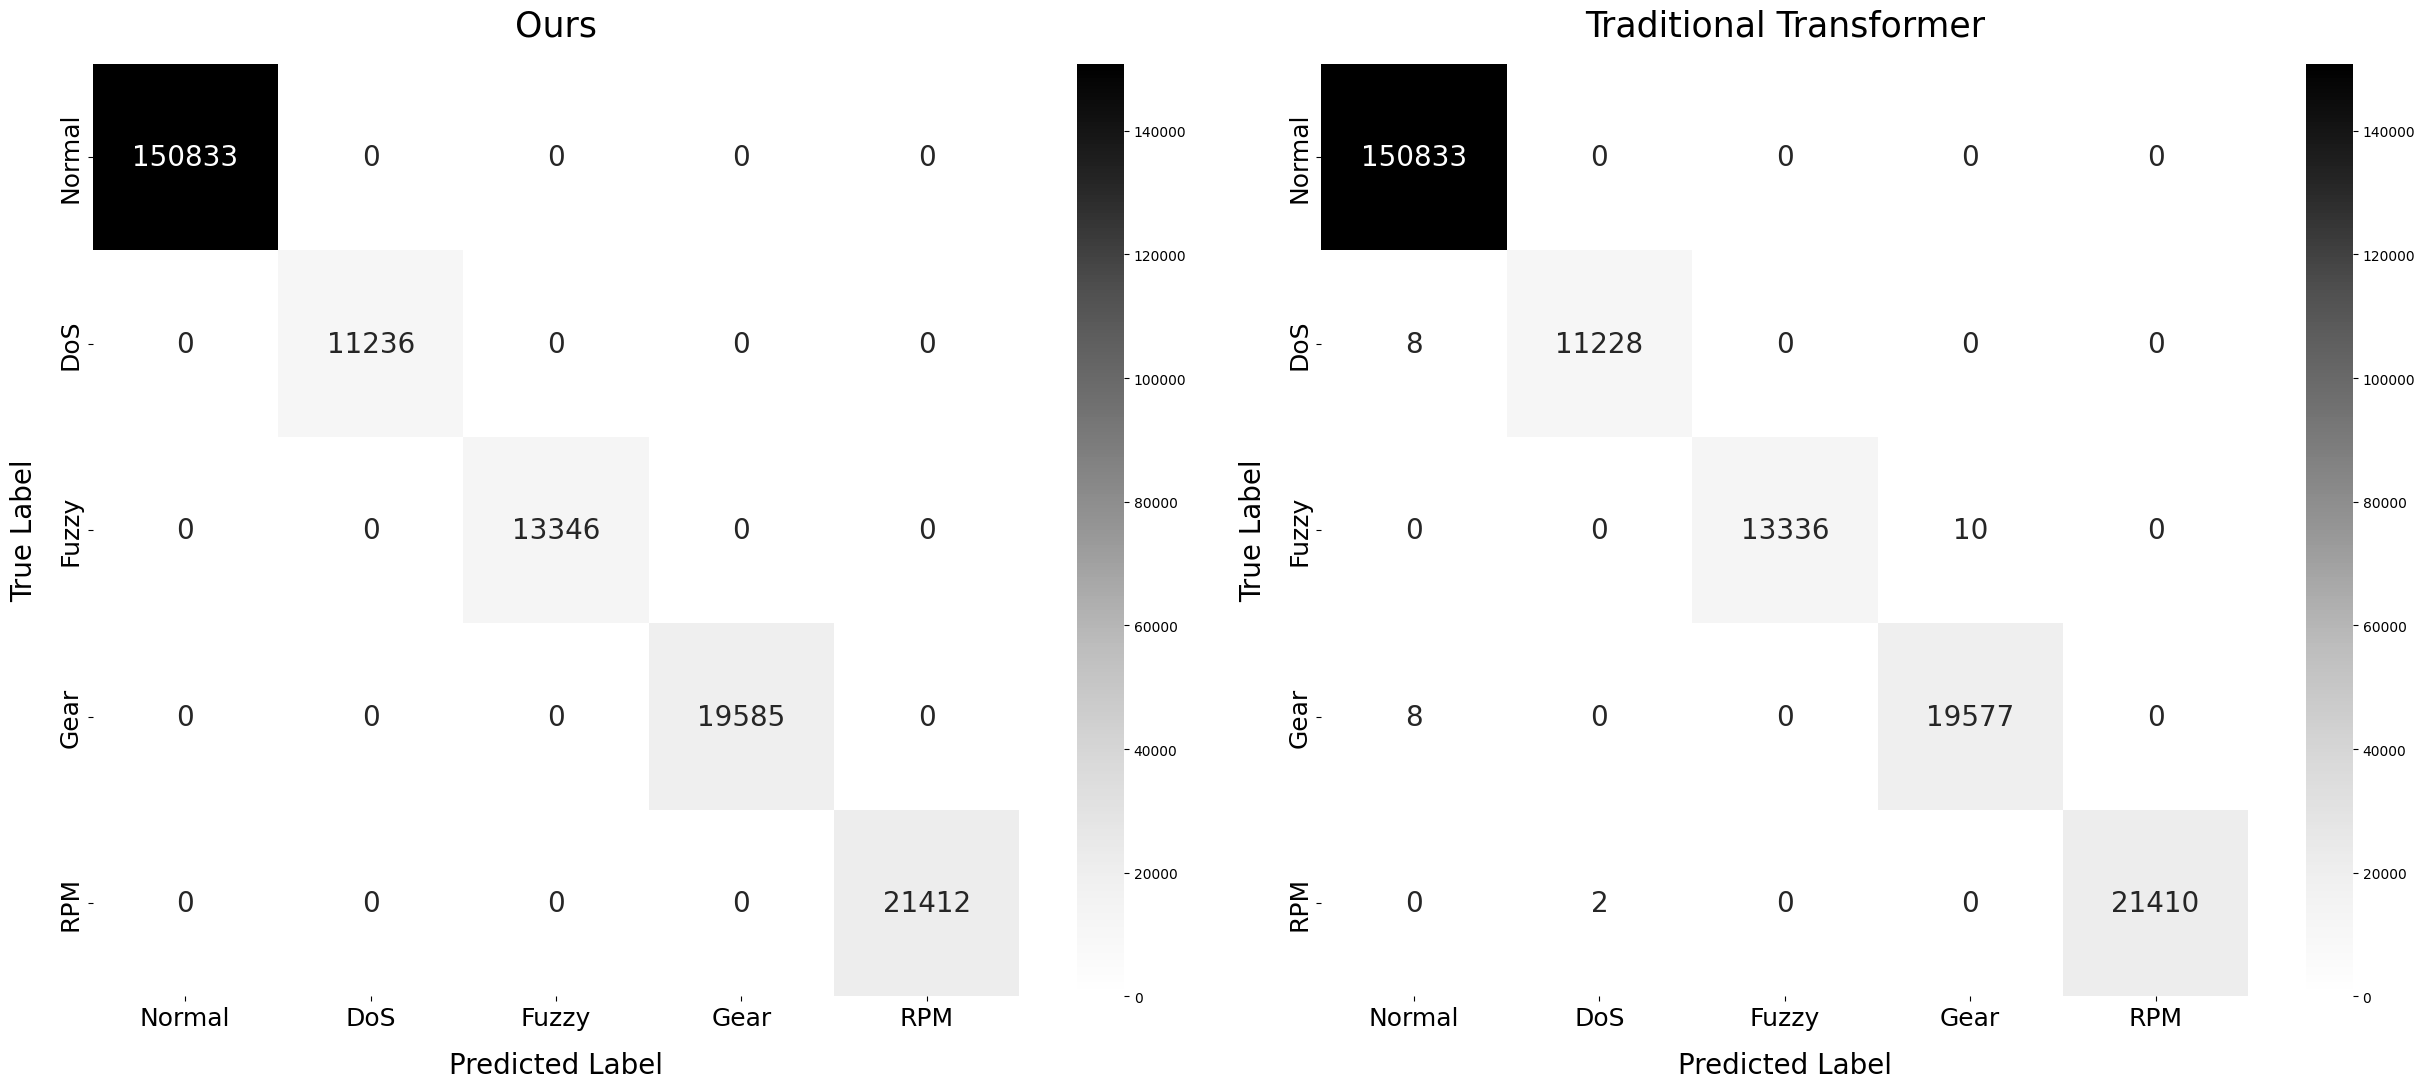

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data for confusion matrix
confusion_matrix_chd = np.array([[150833,      0,      0,      0,      0],
                             [     0,  11236,      0,      0,      0],
                             [     0,      0,  13346,      0,      0],
                             [     0,      0,      0,  19585,      0],
                             [     0,      0,      0,      0,  21412]])
confusion_matrix_chd1 = np.array([[150833,      0,      0,      0,      0],
                             [     8,  11228,      0,      0,      0],
                             [     0,      0,  13336,      10,      0],
                             [     8,      0,      0,  19577,      0],
                             [     0,      2,      0,      0,  21410]])

confusion_matrix_2 = np.array([
    [15110,0,0,1,0,0,0],
    [0,9,0,0,0,0,0],
    [0,0,12,0,0,0,0],
    [3,0,0,2285,0,0,0],
    [5,0,0,0,1686,0,0],
    [0,0,0,0,0,1071,0],
    [0,0,0,0,0,0,1006],
])

cm_mas = np.array([
    [15102,0,0,0,0,0],
    [0,9,0,0,0,0],
    [0,0,2250,0,0,0],
    [0,0,0,1587,0,0],
    [0,0,0,0,1051,0],
    [0,0,0,0,0,990]
])

# Labels for classes
labels = ["Normal", "DoS", "Fuzzy", "Gear", "RPM"]

labelss = ["Normal", "Attack"]
labelsss = ['Normal', 'MEC', 'Fuzzing', 'MS', 
              'RLOn', 'RLOff', 'CS']
labels_mas = ['Normal', 'MEC', 'MS', 
              'RLOn', 'RLOff', 'CS']
cm = np.array([[14394, 0],
               [0, 6448]])

fig, axs = plt.subplots(ncols=2, figsize=(25,11))

# sns.heatmap(cm_mas, annot=True, fmt="d", cmap="Greys", xticklabels=labels_mas, yticklabels=labels_mas, annot_kws={"size": 20}, ax=axs[0])
sns.heatmap(confusion_matrix_chd, annot=True, fmt="d", cmap="Greys", xticklabels=labels, yticklabels=labels, annot_kws={"size": 20}, ax=axs[0])
axs[0].tick_params(labelsize=18)
axs[0].set_ylabel('True Label', fontsize=20, labelpad=15)
axs[0].set_xlabel('Predicted Label', fontsize=20, labelpad=15)
# axs[0].set_title('Ours', fontsize=25, pad=20)
axs[0].set_title('(a) ROAD Masquerade attack', fontsize=25, pad=20)

# sns.heatmap(confusion_matrix_2, annot=True, fmt="d", cmap="Greys", xticklabels=labelsss, yticklabels=labelsss, annot_kws={"size": 20}, ax=axs[1])
sns.heatmap(confusion_matrix_chd1, annot=True, fmt="d", cmap="Greys", xticklabels=labels, yticklabels=labels, annot_kws={"size": 20}, ax=axs[1])
axs[1].tick_params(labelsize=18)
axs[1].set_ylabel('True Label', fontsize=20, labelpad=15)
axs[1].set_xlabel('Predicted Label', fontsize=20, labelpad=15)
# axs[1].set_title('Traditional Transformer', fontsize=25, pad=20)
axs[1].set_title('(b) ROAD Fabrication attack', fontsize=25, pad=20)

plt.tight_layout()
plt.show()


In [35]:
import numpy as np

# Confusion matrix
confusion_matrix_2 = np.array([
    [13715, 2, 0, 2, 0, 0],
    [6, 3, 0, 0, 0, 0],
    [0, 0, 2250, 0, 0, 0],
    [2, 0, 0, 1585, 0, 0],
    [0, 0, 0, 0, 1051, 0],
    [0, 0, 0, 0, 0, 990],
])
confusion_matrix = np.array([
    [15110, 0, 0, 1, 0, 0, 0],
    [0, 9, 0, 0, 0, 0, 0],
    [0, 0, 12, 0, 0, 0, 0],
    [3, 0, 0, 2285, 0, 0, 0],
    [5, 0, 0, 0, 1686, 0, 0],
    [0, 0, 0, 0, 0, 1071, 0],
    [0, 0, 0, 0, 0, 0, 1006],
])

confusion_matrix_test = np.array([
    [15094, 1, 0, 0, 11, 5, 0],
    [0, 9, 0, 0, 0, 0, 0],
    [0, 0, 12, 0, 0, 0, 0],
    [7, 0, 0, 2281, 0, 0, 0],
    [17, 0, 0, 0, 1673, 1, 0],
    [0, 0, 0, 0, 0, 1071, 0],
    [0, 0, 0, 0, 0, 0, 1006],
])

mas_tra_cm = np.array([
    [13714, 1, 0, 3, 1, 0],
    [0, 9, 0, 0, 0, 0],
    [0, 0, 2250, 0, 0, 0],
    [1, 0, 0, 1586, 0, 0],
    [2, 0, 0, 0, 1049, 0],
    [0, 0, 0, 0, 0, 990],
])

mas_tet_cm = np.array([
    [13712, 1, 0, 6, 0, 0],
    [1, 8, 0, 0, 0, 0],
    [0, 0, 2250, 0, 0, 0],
    [1, 0, 0, 1586, 0, 0],
    [2, 0, 0, 0, 1049, 0],
    [0, 0, 0, 0, 0, 990]
])

mas_tra_cm = np.array([
    [13711, 1, 1, 4, 2, 0],
    [2, 7, 0, 0, 0, 0],
    [1, 0, 2249, 0, 0, 0],
    [1, 0, 0, 1586, 0, 0],
    [2, 0, 0, 0, 1049, 0],
    [0, 0, 0, 0, 0, 990],
])

mas_ae_cm = np.array([
    [13714, 0, 0, 5, 0, 0],
    [1, 8, 0, 0, 0, 0],
    [0, 0, 2250, 0, 0, 0],
    [3, 0, 0, 1584, 0, 0],
    [2, 0, 0, 0, 1049, 0],
    [0, 0, 0, 0, 0, 990]
])

# List of attributes
fab_attri = ['Normal', 'max_engine_coolant_temp_attack', 'fuzzing_attack', 'max_speedometer_attack',
             'reverse_light_on_attack', 'reverse_light_off_attack', 'correlated_signal_attack']
mas_attri = ['Normal', 'max_engine_coolant_temp_attack', 'max_speedometer_attack',
             'reverse_light_on_attack', 'reverse_light_off_attack', 'correlated_signal_attack']

# F1 score calculation for each attribute
f1_scores = []


def cal_cm(confusion_matrix, attributes):
    precision_list = []
    recall_list = []
    f1_score_list = []
    for i in range(len(attributes)):
        TP = confusion_matrix[i, i]
        TN = sum(sum(confusion_matrix)) - TP
        FP = sum(confusion_matrix[:, i]) - TP
        FN = sum(confusion_matrix[i, :]) - TP
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1_score = 2 * precision * recall / (precision + recall)
        FNR = (FN / (TP + FN))*100  # False Negative Rate
        FPR = (FP / (FP + TN))*100  # False Positive Rate
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)
        print('Attribute: ', attributes[i], '=======================')
        print('Recall: ', recall)
        print('Precision: ', precision)
        print('F1 score: ', f1_score)
        print('False Negative Rate: ', FNR)  # Print FNR
    macro_precision = sum(precision_list) / len(precision_list)
    macro_recall = sum(recall_list) / len(recall_list)
    macro_f1_score = sum(f1_score_list) / len(f1_score_list)
    print('==========================================')
    print('Macro-Precision: ', macro_precision)
    print('Macro-Recall: ', macro_recall)
    print('Macro-F1 Score: ', macro_f1_score)
    return macro_precision, macro_recall, macro_f1_score


f1 = cal_cm(mas_ae_cm, mas_attri)

# f1_scores_per_attribute = dict(zip(attributes, f1_scores))
# f1_scores_per_attribute

Attribute:  Normal =======================
Recall:  0.9996355419491216
Precision:  0.9995626822157434
F1 score:  0.999599110754765
False Negative Rate:  0.03644580508783439
Attribute:  max_engine_coolant_temp_attack =======================
Recall:  0.8888888888888888
Precision:  1.0
F1 score:  0.9411764705882353
False Negative Rate:  11.11111111111111
Attribute:  max_speedometer_attack =======================
Recall:  1.0
Precision:  1.0
F1 score:  1.0
False Negative Rate:  0.0
Attribute:  reverse_light_on_attack =======================
Recall:  0.998109640831758
Precision:  0.9968533668974198
F1 score:  0.9974811083123425
False Negative Rate:  0.1890359168241966
Attribute:  reverse_light_off_attack =======================
Recall:  0.9980970504281637
Precision:  1.0
F1 score:  0.9990476190476191
False Negative Rate:  0.19029495718363465
Attribute:  correlated_signal_attack =======================
Recall:  1.0
Precision:  1.0
F1 score:  1.0
False Negative Rate:  0.0
Macro-Precision:  0.